# **Importurile **

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [94]:
db=pd.read_csv("imdb-movies-dataset.csv")
db

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Cast,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"Anne Hathaway, Nicholas Galitzine, Ella Rubin,...","28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"Owen Teague, Freya Allan, Kevin Durand, Peter ...","22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"Isaac Bae, Jerry Seinfeld, Chris Rickett, Rach...","18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"Ryan Gosling, Emily Blunt, Aaron Taylor-Johnso...","38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"Zendaya, Mike Faist, Josh O'Connor, Darnell Ap...","32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,https://m.media-amazon.com/images/M/MV5BMzg5MW...,The Greatest Show on Earth,2020.0,U,152.0,"Drama, Family, Romance",6.5,76.0,Cecil B. DeMille,"James Stewart, Charlton Heston, Betty Hutton, ...","16,078","The dramatic lives of trapeze artists, a clown...",128,"Hey, doesn't anyone remember Last Emperor?",It constantly amazes me that people carp that ...
9996,https://m.media-amazon.com/images/M/MV5BYzA0ZG...,Berserk: Ougon Jidai-hen I - Haou no Tamago,2020.0,NaN,76.0,"Animation, Action, Adventure",7.5,NaN,Toshiyuki Kubooka,"Hiroaki Iwanaga, Carrie Keranen, Takahiro Saku...","14,300",A lone sellsword named Guts gets recruited int...,12,Masterfully directed climatic epic saga,Few stories can capture your mind and soul in ...
9997,https://m.media-amazon.com/images/M/MV5BM2U1Mj...,Is-slottet,2020.0,NaN,78.0,"Mystery, Drama",6.5,NaN,Per Blom,"Line Storesund, Hilde Nyeggen Martinsen, Meret...",740,A couple of twelve-year-old Norwegian girls st...,4,Beautiful Film,"This film might not be to everyone's taste, it..."
9998,https://m.media-amazon.com/images/M/MV5BMTAwOD...,Loving Pablo,2020.0,A,123.0,"Biography, Crime, Drama",6.4,42.0,Fernando León de Aranoa,"Javier Bardem, Penélope Cruz, Peter Sarsgaard,...","22,447",A journalist strikes up a romantic relationshi...,84,That film should be in Spanish,Why anyone (the director?) made Spanish actors...


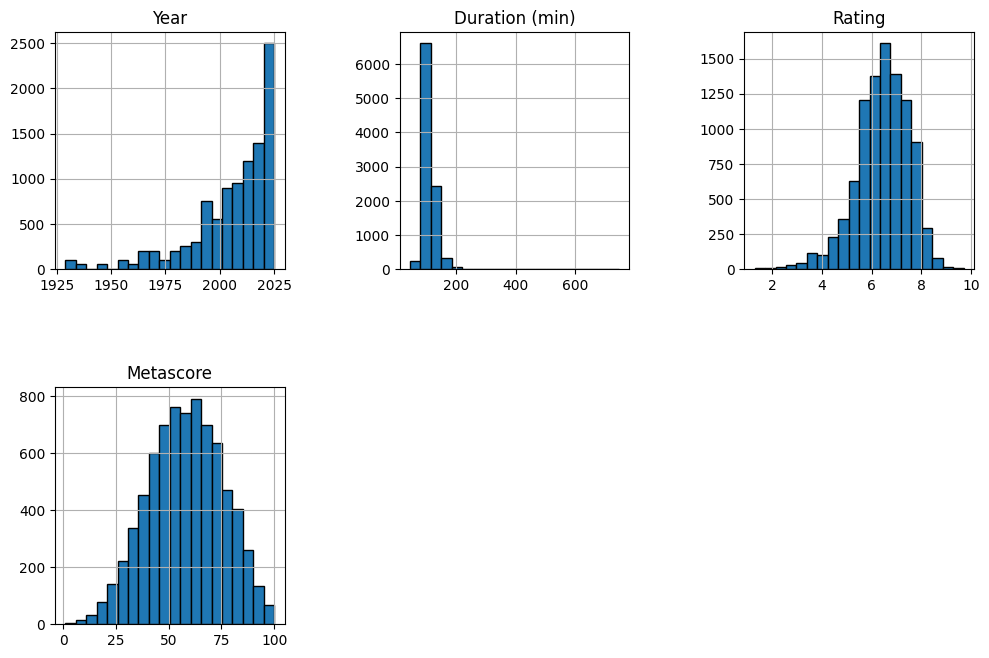

In [95]:
db.hist(figsize=(10,10), bins=20, layout=(3,3),edgecolor='black')
plt.tight_layout()
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

In [96]:
db.describe()

,Year,Duration (min),Rating,Metascore
count,9850.000000,9664.000000,9596.000000,7555.000000
mean,2005.761421,108.809603,6.438610,58.068299
std,18.958005,23.159749,1.051412,17.845240
min,1929.000000,45.000000,1.300000,1.000000
25%,1997.000000,95.000000,5.800000,45.500000
50%,2012.000000,105.000000,6.500000,58.000000
75%,2021.000000,118.000000,7.200000,71.000000
max,2025.000000,746.000000,9.700000,100.000000


In [97]:
db.isnull().sum()

Poster               0
Title                0
Year               150
Certificate       2630
Duration (min)     336
Genre                7
Rating             404
Metascore         2445
Director             5
Cast                39
Votes              404
Description          0
Review Count         1
Review Title       517
Review             516
dtype: int64

In [98]:
db.drop(columns=['Cast'], inplace=True)
db.head()

,Poster,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Votes,Description,Review Count,Review Title,Review
0,https://m.media-amazon.com/images/M/MV5BYWRkZj...,The Idea of You,2023.0,R,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,"28,744","Solène, a 40-year-old single mom, begins an un...",166,Hypocrisy as an idea,"This film, as well as the reaction to it, is a..."
1,https://m.media-amazon.com/images/M/MV5BZGI4NT...,Kingdom of the Planet of the Apes,2023.0,PG-13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,"22,248","Many years after the reign of Caesar, a young ...",183,A phenomenal start to another trilogy!,"I'm a big fan of all the planet of the apes, a..."
2,https://m.media-amazon.com/images/M/MV5BZjIyOT...,Unfrosted,2023.0,PG-13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,"18,401","In 1963 Michigan, business rivals Kellogg's an...",333,not funny,Pretty much the worst criticism you can lay on...
3,https://m.media-amazon.com/images/M/MV5BMjA5Zj...,The Fall Guy,2023.0,PG-13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,"38,953",A down-and-out stuntman must find the missing ...,384,Everything you needed and more!,Just got out of the Austin premier at SXSW and...
4,https://m.media-amazon.com/images/M/MV5BNTk1MT...,Challengers,2023.0,R,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,"32,517","Tashi, a former tennis prodigy turned coach, t...",194,"Watch ""Match Point"" instead",This is a tough one. I liked the concept and t...


In [99]:
for column in db.columns:
    percentage = db[column].isnull().mean()
    print(f'{column}: {percentage:.2%}')

Poster: 0.00%
Title: 0.00%
Year: 1.50%
Certificate: 26.30%
Duration (min): 3.36%
Genre: 0.07%
Rating: 4.04%
Metascore: 24.45%
Director: 0.05%
Votes: 4.04%
Description: 0.00%
Review Count: 0.01%
Review Title: 5.17%
Review: 5.16%


In [100]:
db.dtypes

Poster             object
Title              object
Year              float64
Certificate        object
Duration (min)    float64
Genre              object
Rating            float64
Metascore         float64
Director           object
Votes              object
Description        object
Review Count       object
Review Title       object
Review             object
dtype: object

# **Maparea categoriilor de vârstă la valori numerice**

In [101]:
# Definim maparea categoriilor de vârstă la valori numerice
certificate_mapping = {
    "G": 0,
    "PG": 10,
    "PG-13": 13,
    "R": 17,
    "NC-17": 18
}

# Aplicăm maparea
db['Certificate'] = db['Certificate'].map(certificate_mapping)

# Calculăm media și completăm valorile lipsă
mean_certificate = db['Certificate'].mean()
db['Certificate'].fillna(round(mean_certificate), inplace=True)

# Convertim în Int64
db['Certificate'] = db['Certificate'].astype('Int64')

C:\Users\Admin\AppData\Local\Temp\ipykernel_17716\3913050420.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db['Certificate'].fillna(round(mean_certificate), inplace=True)


In [102]:
db['Votes'] = pd.to_numeric(db['Votes'].str.replace(',', ''), errors='coerce').fillna(0).astype('Int64')

In [103]:
# Înlocuiește eventualele virgule și spații, apoi convertește în int
db['Review Count'] = db['Review Count'].astype(str).str.replace(',', '').str.strip()

# Convertește în int64, ignorând sau înlocuind valorile invalide
db['Review Count'] = pd.to_numeric(db['Review Count'], errors='coerce').fillna(0).astype('int64')

In [104]:
# Eliminăm coloanele 'Review Title' și 'Review'
db = db.drop(columns=['Poster','Review Title', 'Review'])
db['Director'] = db['Director'].fillna('Unknown')

# Afișăm primele 5 rânduri pentru confirmare
db.head()

,Title,Year,Certificate,Duration (min),Genre,Rating,Metascore,Director,Votes,Description,Review Count
0,The Idea of You,2023.0,17,115.0,"Comedy, Drama, Romance",6.4,67.0,Michael Showalter,28744,"Solène, a 40-year-old single mom, begins an un...",166
1,Kingdom of the Planet of the Apes,2023.0,13,145.0,"Action, Adventure, Sci-Fi",7.3,66.0,Wes Ball,22248,"Many years after the reign of Caesar, a young ...",183
2,Unfrosted,2023.0,13,97.0,"Biography, Comedy, History",5.5,42.0,Jerry Seinfeld,18401,"In 1963 Michigan, business rivals Kellogg's an...",333
3,The Fall Guy,2023.0,13,126.0,"Action, Comedy, Drama",7.3,73.0,David Leitch,38953,A down-and-out stuntman must find the missing ...,384
4,Challengers,2023.0,17,131.0,"Drama, Romance, Sport",7.7,82.0,Luca Guadagnino,32517,"Tashi, a former tennis prodigy turned coach, t...",194


# **Refacerea coloanei Genre in coloane binare cu fiecare gen de film**

In [105]:
# Refacem setul de genuri unice din coloana 'Genre'
genre_set = set()

for genre_list in db['Genre'].dropna():
    genres = [g.strip() for g in genre_list.split(',')]
    genre_set.update(genres)

# Creăm o coloană binară pentru fiecare gen
for genre in genre_set:
    db[genre] = db['Genre'].apply(lambda x: int(genre in x) if pd.notnull(x) else 0)

db.head()
db =db.drop(columns = ['Genre'])

In [106]:
cols_to_convert = ['Year', 'Duration (min)', 'Rating', 'Metascore']

for col in cols_to_convert:
    # Curățare + conversie la float
    db[col] = pd.to_numeric(db[col].astype(str).str.replace(',', ''), errors='coerce')
    # Rotunjire și conversie la Int64
    db[col] = db[col].round().astype('Int64')



In [107]:
db.dtypes

Title             object
Year               Int64
Certificate        Int64
Duration (min)     Int64
Rating             Int64
Metascore          Int64
Director          object
Votes              Int64
Description       object
Review Count       int64
Documentary        int64
Adventure          int64
Musical            int64
History            int64
War                int64
Fantasy            int64
Sci-Fi             int64
Animation          int64
Film-Noir          int64
Western            int64
Crime              int64
Sport              int64
Romance            int64
Music              int64
Mystery            int64
Action             int64
Biography          int64
Drama              int64
Comedy             int64
Thriller           int64
Family             int64
Horror             int64
dtype: object

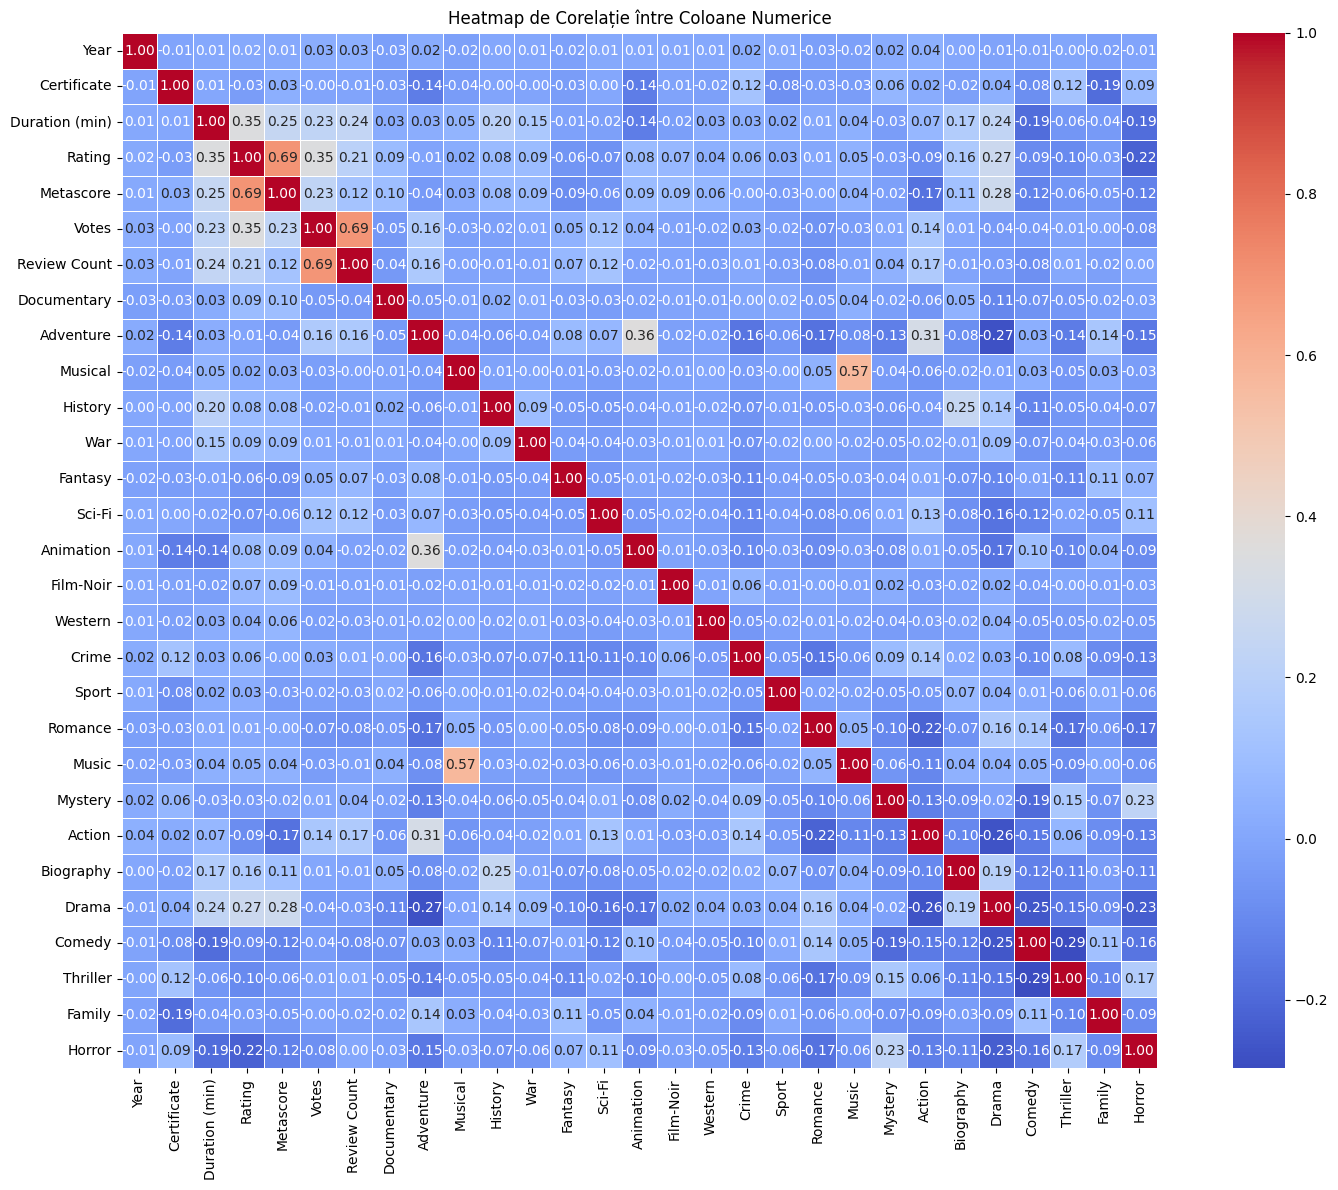

In [108]:
# Recărcăm matricea de corelație
correlation_matrix = db.select_dtypes(include=['int64', 'float64']).corr()

# Afișăm din nou heatmap-ul
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Heatmap de Corelație între Coloane Numerice')
plt.tight_layout()
plt.show()

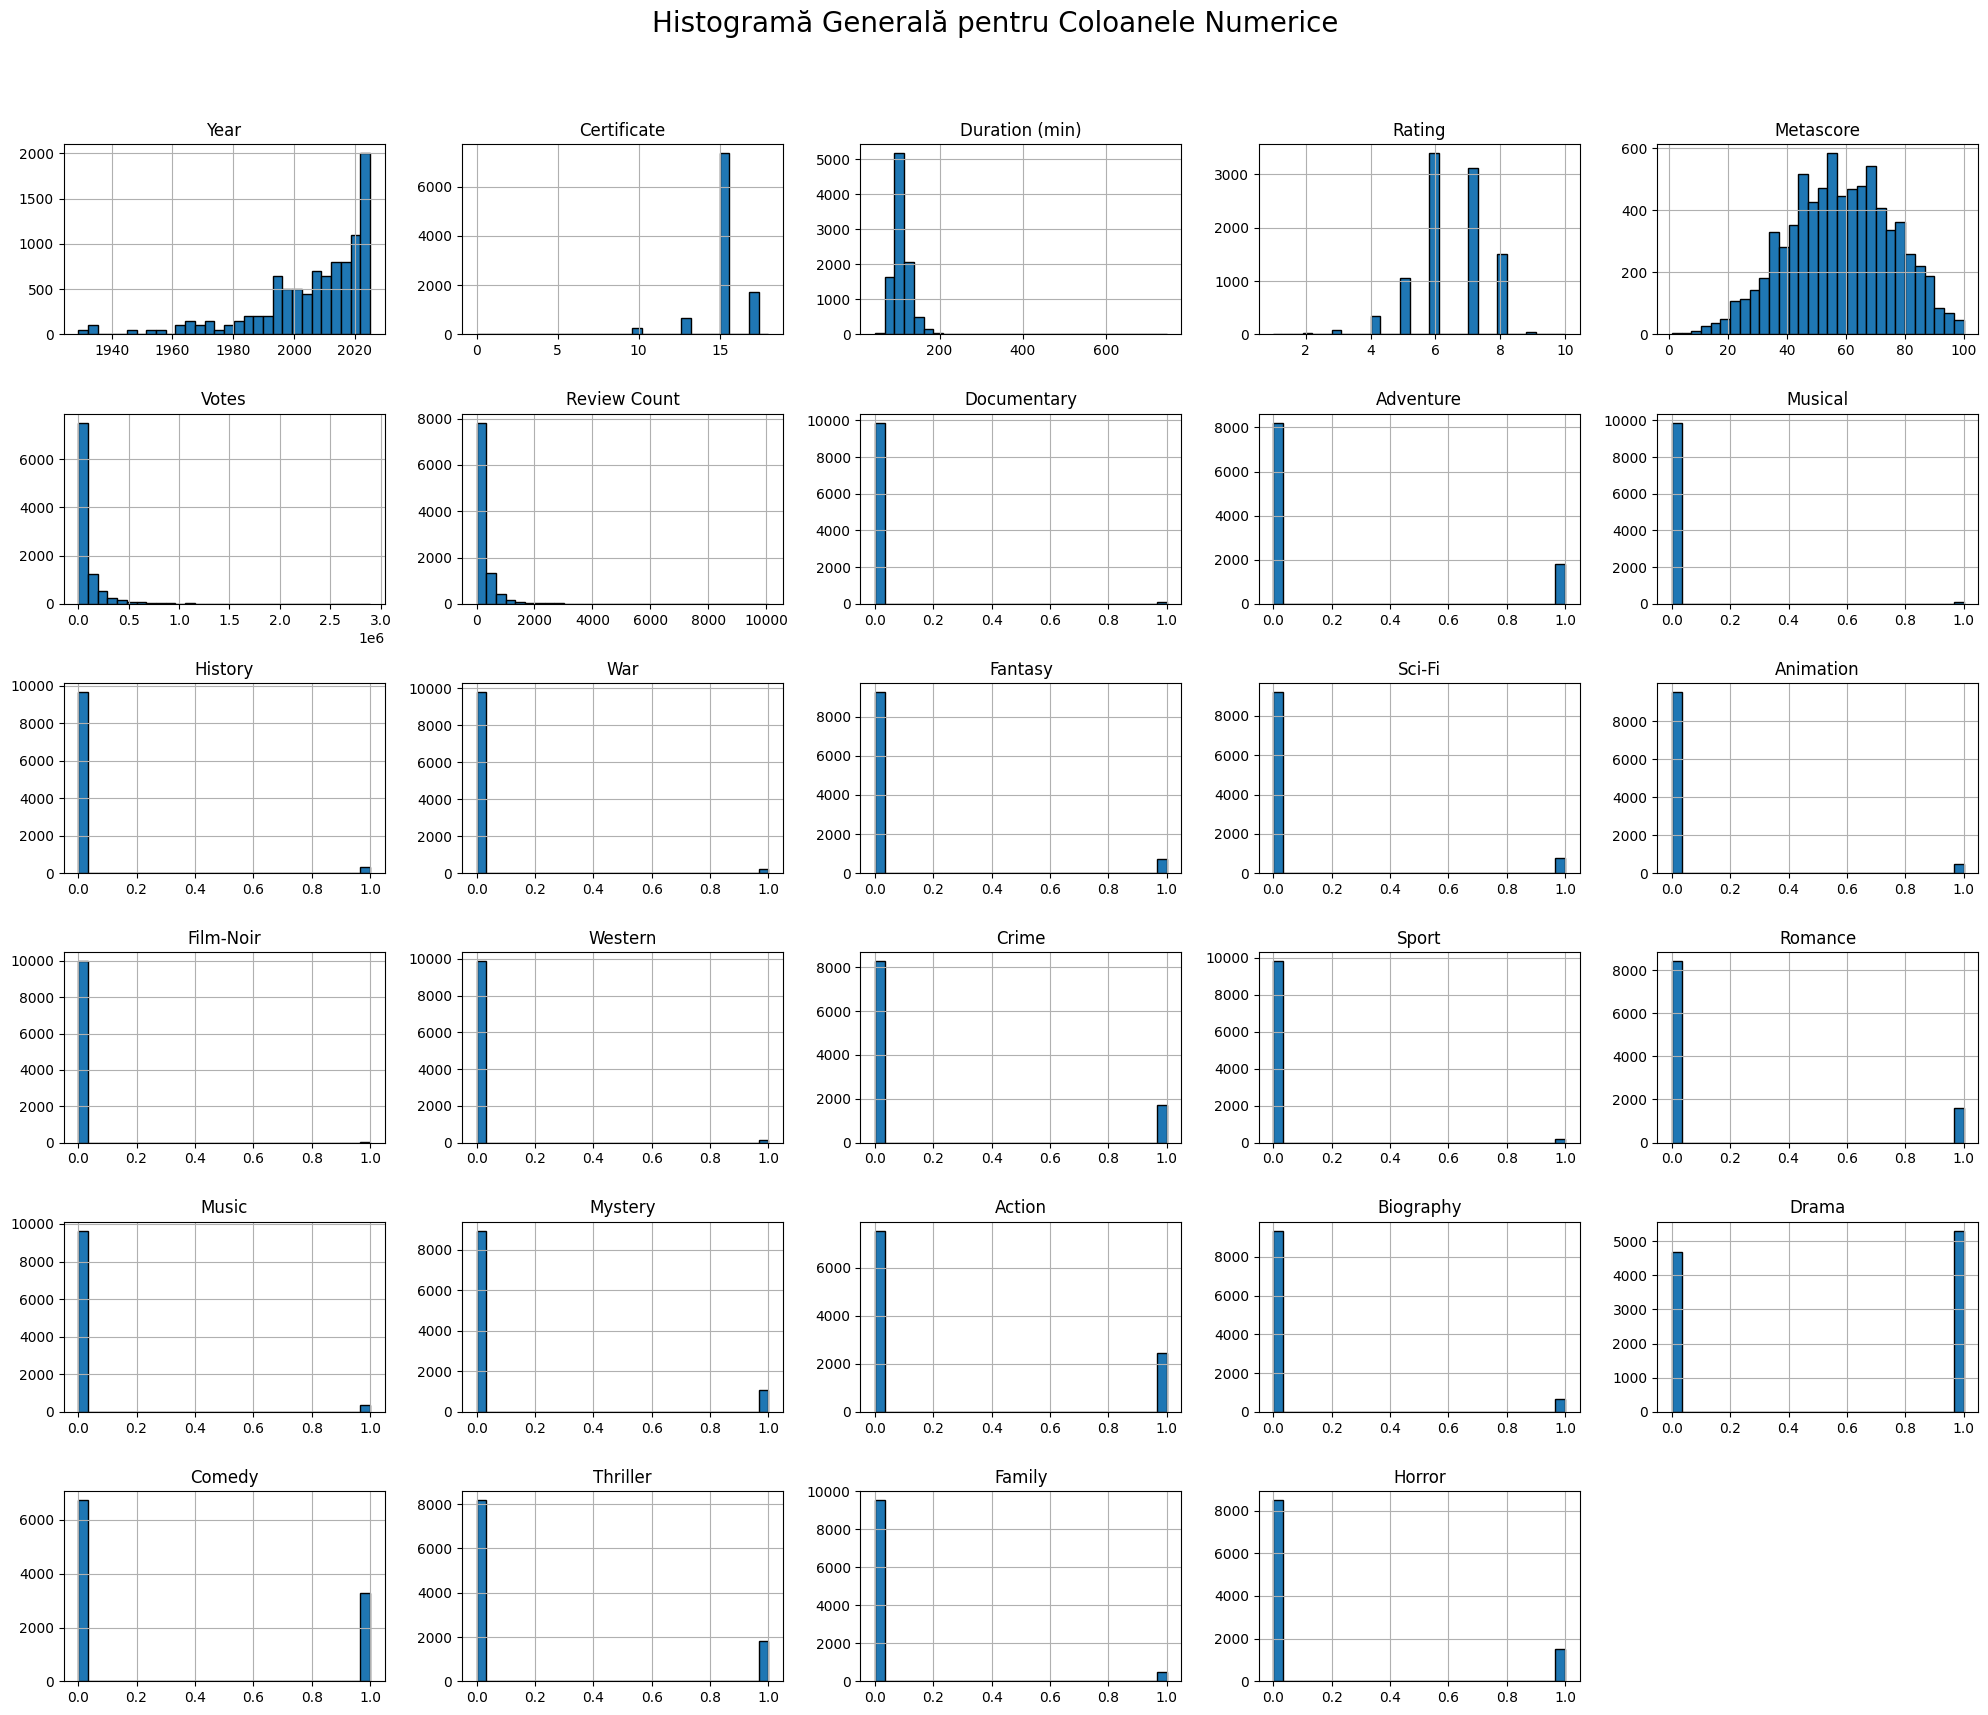

In [109]:
# Selectăm doar coloanele numerice pentru histogramă
numeric_cols = db.select_dtypes(include=['int64', 'float64'])

# Creăm histograme pentru toate coloanele numerice
numeric_cols.hist(figsize=(20, 18), bins=30, edgecolor='black')
plt.suptitle('Histogramă Generală pentru Coloanele Numerice', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [110]:
db['Year'] = db['Year'].interpolate(method='linear')

db['Duration (min)'] = db['Duration (min)'].fillna(db['Duration (min)'].median())

db['Rating'] = db['Rating'].fillna(db['Rating'].median())

db['Metascore'] = db['Metascore'].fillna(db['Metascore'].median())

In [111]:

db.isnull().sum()

Title             0
Year              0
Certificate       0
Duration (min)    0
Rating            0
Metascore         0
Director          0
Votes             0
Description       0
Review Count      0
Documentary       0
Adventure         0
Musical           0
History           0
War               0
Fantasy           0
Sci-Fi            0
Animation         0
Film-Noir         0
Western           0
Crime             0
Sport             0
Romance           0
Music             0
Mystery           0
Action            0
Biography         0
Drama             0
Comedy            0
Thriller          0
Family            0
Horror            0
dtype: int64

In [112]:
def calculate_entropy(column):
    counts = column.value_counts(normalize=True, dropna=True)
    return -np.sum(counts * np.log2(counts))

# Calculează entropia pentru fiecare coloană
entropy_per_column = db.apply(calculate_entropy)

# Afișează rezultatele
entropy_df = entropy_per_column.reset_index()
entropy_df.columns = ['Column', 'Entropy']
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

print(entropy_df)

            Column    Entropy
8      Description  13.266978
0            Title  13.212554
7            Votes  12.840101
6         Director  11.569590
9     Review Count   9.063846
3   Duration (min)   6.144098
1             Year   5.566574
5        Metascore   5.377084
4           Rating   2.103105
2      Certificate   1.180438
27           Drama   0.997332
28          Comedy   0.911310
25          Action   0.806167
29        Thriller   0.684216
11       Adventure   0.677005
20           Crime   0.664522
22         Romance   0.631912
31          Horror   0.613333
24         Mystery   0.493244
16          Sci-Fi   0.399354
15         Fantasy   0.382497
26       Biography   0.348518
17       Animation   0.278270
30          Family   0.273948
23           Music   0.227423
13         History   0.210680
21           Sport   0.143122
14             War   0.142002
19         Western   0.110545
10     Documentary   0.096314
12         Musical   0.096314
18       Film-Noir   0.035218


In [113]:
def calculate_entropy(column):
    counts = column.value_counts(normalize=True, dropna=True)
    return -np.sum(counts * np.log2(counts))

# Calculează entropia pentru fiecare coloană
entropy_per_column = db.apply(calculate_entropy)

# Afișează rezultatele
entropy_df = entropy_per_column.reset_index()
entropy_df.columns = ['Column', 'Entropy']
entropy_df = entropy_df.sort_values(by='Entropy', ascending=False)

print(entropy_df)

            Column    Entropy
8      Description  13.266978
0            Title  13.212554
7            Votes  12.840101
6         Director  11.569590
9     Review Count   9.063846
3   Duration (min)   6.144098
1             Year   5.566574
5        Metascore   5.377084
4           Rating   2.103105
2      Certificate   1.180438
27           Drama   0.997332
28          Comedy   0.911310
25          Action   0.806167
29        Thriller   0.684216
11       Adventure   0.677005
20           Crime   0.664522
22         Romance   0.631912
31          Horror   0.613333
24         Mystery   0.493244
16          Sci-Fi   0.399354
15         Fantasy   0.382497
26       Biography   0.348518
17       Animation   0.278270
30          Family   0.273948
23           Music   0.227423
13         History   0.210680
21           Sport   0.143122
14             War   0.142002
19         Western   0.110545
10     Documentary   0.096314
12         Musical   0.096314
18       Film-Noir   0.035218


In [114]:
import pandas as pd
import numpy as np

# Asigură-te că coloana HighlyRated există
db['HighlyRated'] = (db['Rating'] > 5).astype(int)

# Function to calculate entropy
def calculate_entropy(column):
    counts = column.value_counts(normalize=True, dropna=True)
    return -np.sum(counts * np.log2(counts))

# Function to calculate Information Gain
def information_gain(feature, target):
    valid = feature.notna() & target.notna()
    feature = feature[valid]
    target = target[valid]
    total_entropy = calculate_entropy(target)
    weighted_entropy = 0
    for val in feature.unique():
        subset = target[feature == val]
        weighted_entropy += (len(subset) / len(target)) * calculate_entropy(subset)
    return total_entropy - weighted_entropy

# Columns to exclude
excluded_columns = {'Poster', 'Title', 'Cast', 'Description', 'Review Title', 'Review', 'Genre'}
valid_columns = [col for col in db.columns if col not in excluded_columns and col != 'HighlyRated' and db[col].nunique() > 1]

# Compute Information Gain
ig_values = {col: round(information_gain(db[col], db['HighlyRated']), 6) for col in valid_columns}

# Create DataFrame and sort
ig_db = pd.Series(ig_values).sort_values(ascending=False).reset_index()
ig_db.columns = ['Column', 'Information Gain']

# Show results
print(ig_db)

            Column  Information Gain
0           Rating          0.614823
1            Votes          0.580287
2         Director          0.439265
3        Metascore          0.138731
4     Review Count          0.113543
5   Duration (min)          0.068917
6             Year          0.022631
7            Drama          0.020582
8           Horror          0.016983
9        Biography          0.010015
10        Thriller          0.004051
11       Animation          0.003779
12         History          0.003305
13           Crime          0.003296
14     Certificate          0.002827
15             War          0.002411
16          Sci-Fi          0.001597
17           Music          0.001574
18     Documentary          0.000981
19           Sport          0.000967
20         Fantasy          0.000967
21       Film-Noir          0.000882
22          Action          0.000821
23          Family          0.000742
24         Romance          0.000685
25         Mystery          0.000611
2

In [115]:
db.to_csv('C:\\Users\\Admin\\Desktop\\imdb\\imdb-movies-dataset-clean.csv',index=False)


In [116]:
# Load the cleaned dataset
db_clean = pd.read_csv("imdb-movies-dataset-clean.csv")

# Display column types to verify and select only non-text features
db_clean.dtypes

Title              object
Year              float64
Certificate         int64
Duration (min)      int64
Rating              int64
Metascore           int64
Director           object
Votes               int64
Description        object
Review Count        int64
Documentary         int64
Adventure           int64
Musical             int64
History             int64
War                 int64
Fantasy             int64
Sci-Fi              int64
Animation           int64
Film-Noir           int64
Western             int64
Crime               int64
Sport               int64
Romance             int64
Music               int64
Mystery             int64
Action              int64
Biography           int64
Drama               int64
Comedy              int64
Thriller            int64
Family              int64
Horror              int64
HighlyRated         int64
dtype: object

# **Antrenarea a 3 modele: Random Forest, Linear Regression si Decision Tree**

In [117]:
# Recitim fișierul și reconstruim X și y corect
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Reload dataset
df = pd.read_csv("imdb-movies-dataset-clean.csv")

# Definim X și y
X = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Rating'])
y = df['Rating']

# Eliminăm coloana HighlyRated
X_no_highlyrated = X.drop(columns=['HighlyRated'])

# Împărțim datele în train/test cu 70% test
X_train_nh, X_test_nh, y_train_nh, y_test_nh = train_test_split(X_no_highlyrated, y, test_size=0.7, random_state=42)

# Reantrenăm modelele
linreg_nh = LinearRegression().fit(X_train_nh, y_train_nh)
dtree_nh = DecisionTreeRegressor(random_state=42).fit(X_train_nh, y_train_nh)
rf_nh = RandomForestRegressor(random_state=42).fit(X_train_nh, y_train_nh)

# Predicții
y_pred_linreg_nh = linreg_nh.predict(X_test_nh)
y_pred_dtree_nh = dtree_nh.predict(X_test_nh)
y_pred_rf_nh = rf_nh.predict(X_test_nh)

# Evaluare
results = {
    "Linear Regression": {
        "MSE": mean_squared_error(y_test_nh, y_pred_linreg_nh),
        "R²": r2_score(y_test_nh, y_pred_linreg_nh)
    },
    "Decision Tree": {
        "MSE": mean_squared_error(y_test_nh, y_pred_dtree_nh),
        "R²": r2_score(y_test_nh, y_pred_dtree_nh)
    },
    "Random Forest": {
        "MSE": mean_squared_error(y_test_nh, y_pred_rf_nh),
        "R²": r2_score(y_test_nh, y_pred_rf_nh)
    }
}

results


{'Linear Regression': {'MSE': 0.6287676002626444, 'R²': 0.44938199521759514},
 'Decision Tree': {'MSE': 1.0871428571428572, 'R²': 0.04797825036881698},
 'Random Forest': {'MSE': 0.5581296857142857, 'R²': 0.5112403154528625}}

# **Compararea predictiilor modelelor cu coloana Rating**

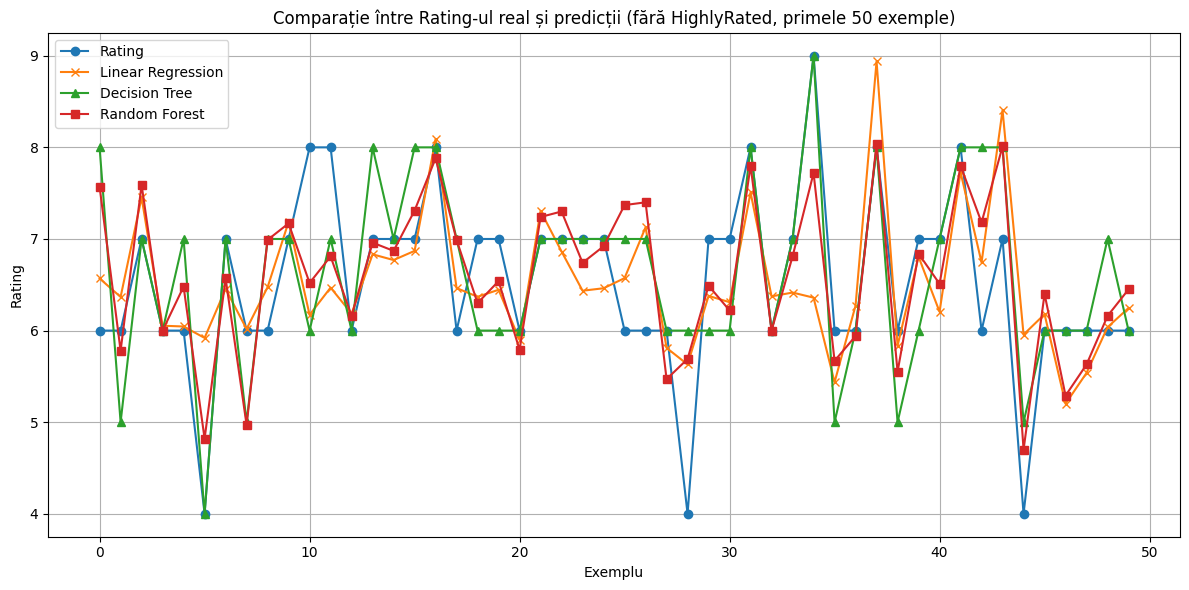

In [118]:
# Refacem totul fără coloana 'HighlyRated'

# Eliminăm 'HighlyRated' dacă există
X_no_highlyrated = db_clean.select_dtypes(include=['int64', 'float64']).drop(columns=['Rating', 'HighlyRated'])
y = db_clean['Rating']

# Împărțim datele în train și test
X_train, X_test, y_train, y_test = train_test_split(X_no_highlyrated, y, test_size=0.2, random_state=42)

# Antrenăm cele 3 modele
linreg = LinearRegression().fit(X_train, y_train)
dtree = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
rf = RandomForestRegressor(random_state=42).fit(X_train, y_train)

# Facem predicții
y_pred_linreg = linreg.predict(X_test)
y_pred_dtree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Comparație între real și prezis
comparison_df = pd.DataFrame({
    'Rating': y_test.values,
    'Predicted Linear Regression': y_pred_linreg,
    'Predicted Decision Tree': y_pred_dtree,
    'Predicted Random Forest': y_pred_rf
})

# Grafic pentru primele 50 de exemple
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Rating'].values[:50], label='Rating', marker='o')
plt.plot(comparison_df['Predicted Linear Regression'].values[:50], label='Linear Regression', marker='x')
plt.plot(comparison_df['Predicted Decision Tree'].values[:50], label='Decision Tree', marker='^')
plt.plot(comparison_df['Predicted Random Forest'].values[:50], label='Random Forest', marker='s')

plt.title('Comparație între Rating-ul real și predicții (fără HighlyRated, primele 50 exemple)')
plt.xlabel('Exemplu')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Comparatii**

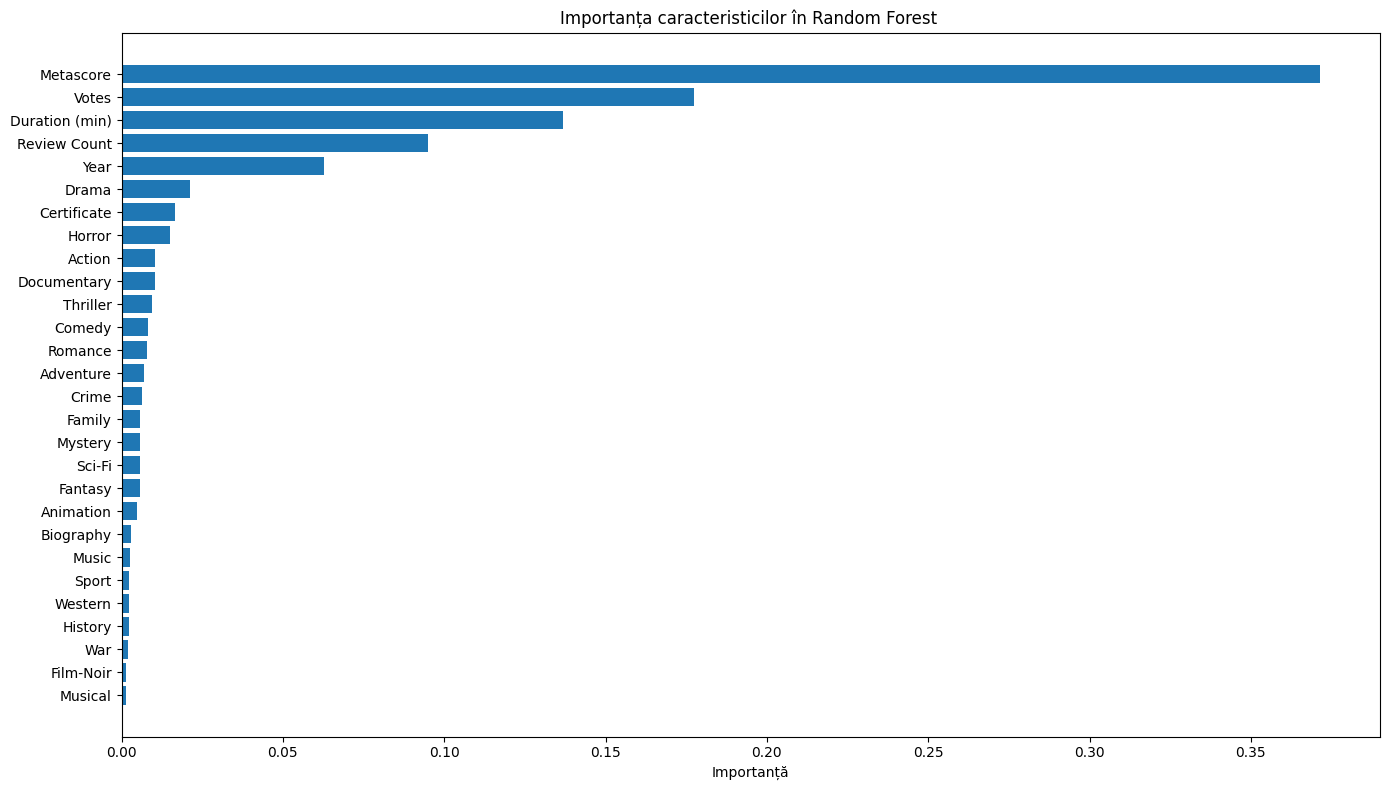

In [123]:
rf_nh = RandomForestRegressor(random_state=42)
rf_nh.fit(X_train, y_train)  # X_train fără HighlyRated a fost deja definit anterior

importances_nh = rf_nh.feature_importances_
feature_names_nh = X_train.columns

# Organizăm într-un DataFrame pentru vizualizare
importance_df_nh = pd.DataFrame({
    'Feature': feature_names_nh,
    'Importance': importances_nh
}).sort_values(by='Importance', ascending=False)

# Plot importanțele fără HighlyRated
plt.figure(figsize=(14, 8))
plt.barh(importance_df_nh['Feature'], importance_df_nh['Importance'])
plt.xlabel('Importanță')
plt.title('Importanța caracteristicilor în Random Forest ')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


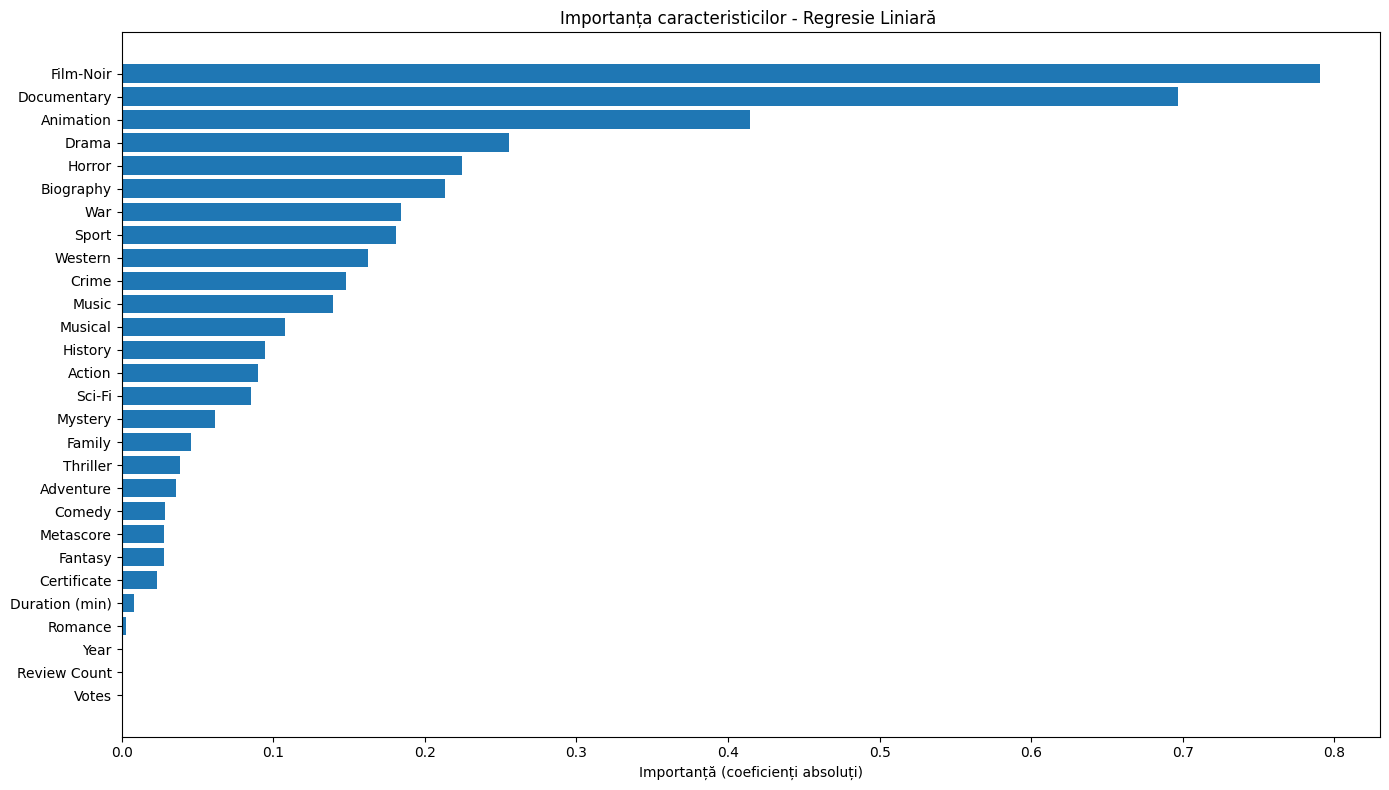

In [124]:
linreg_importance_nh = pd.DataFrame({
    'Feature': X_train.columns,  # X_train fără HighlyRated
    'Importance': abs(linreg.coef_)  # coeficienții modelului antrenat fără HighlyRated
}).sort_values(by='Importance', ascending=False)

# Replotăm importanțele
plt.figure(figsize=(14, 8))
plt.barh(linreg_importance_nh['Feature'], linreg_importance_nh['Importance'])
plt.xlabel('Importanță (coeficienți absoluți)')
plt.title('Importanța caracteristicilor - Regresie Liniară ')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

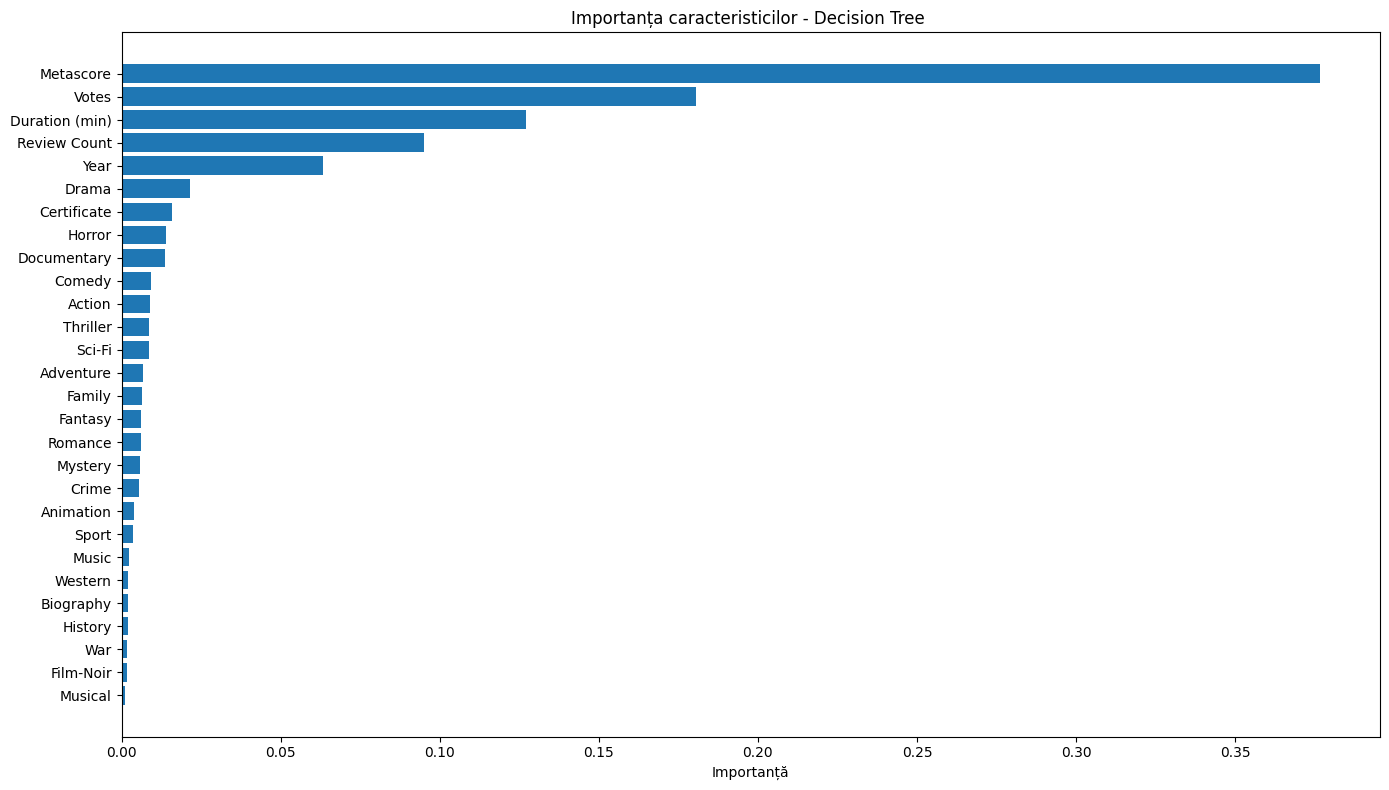

In [125]:
# Recalculăm importanțele pentru arborele decizional fără 'HighlyRated'
dtree_importance_nh = pd.DataFrame({
    'Feature': X_train.columns,  # X_train fără HighlyRated
    'Importance': dtree.feature_importances_  # model antrenat fără HighlyRated
}).sort_values(by='Importance', ascending=False)

# Replotăm importanțele
plt.figure(figsize=(14, 8))
plt.barh(dtree_importance_nh['Feature'], dtree_importance_nh['Importance'])
plt.xlabel('Importanță')
plt.title('Importanța caracteristicilor - Decision Tree ')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# **Alegerea modelului Random Forest**

În urma testării și comparării mai multor algoritmi de regresie (regresie liniară, arbore decizional și Random Forest), am ales modelul Random Forest ca soluție finală datorită performanței sale superioare și robusteței demonstrate pe setul de date. Acesta a înregistrat cele mai bune valori ale metricei R² și cele mai mici erori (MSE), atât în prezența tuturor caracteristicilor, cât și atunci când a fost exclus atributul HighlyRated, ceea ce confirmă capacitatea sa de generalizare. 

Alegerea modelului a fost susținută de faptul că Random Forest este capabil să surprindă relații complexe și non-liniare între variabile, fără a necesita transformări suplimentare ale datelor. În plus, modelul reduce riscul de overfitting prin agregarea mai multor arbori decizionali, ceea ce îl face mai stabil comparativ cu un arbore decizional simplu. Un alt avantaj important este faptul că Random Forest oferă informații despre importanța caracteristicilor, permițând interpretarea parțială a deciziilor modelului. 

În acest context, Random Forest s-a dovedit a fi un model versatil, fiind utilizat atât pentru predicția ratingurilor, cât și pentru dezvoltarea unui sistem de recomandare pe baza scorurilor estimate.

# **Sistem de recomandare**

In [126]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Încarcă datasetul și pregătește coloanele
db_clean = pd.read_csv("imdb-movies-dataset-clean.csv")
X = db_clean.select_dtypes(include=['int64', 'float64']).drop(columns=['Rating'])
y = db_clean['Rating']
X_no_highlyrated = X.drop(columns=['HighlyRated'])

# Reantrenează Random Forest (dacă nu e deja antrenat)
rf_nh = RandomForestRegressor(random_state=42).fit(X_no_highlyrated, y)

# Funcție de recomandare pe baza predicției Random Forest
def recomanda_filme_rf(input_dict, top_n=10):
    # Convertim inputul într-un DataFrame
    input_df = pd.DataFrame([input_dict])[X_no_highlyrated.columns]
    
    # Prezicem ratingul pentru input
    predicted_rating = rf_nh.predict(input_df)[0]
    
    # Prezicem ratingurile pentru toate filmele din set
    all_predictions = rf_nh.predict(X_no_highlyrated)
    
    # Calculăm diferențele absolute față de input
    diff = abs(all_predictions - predicted_rating)
    
    # Obținem top N cele mai apropiate filme
    top_indices = diff.argsort()[:top_n]
    
    # Returnăm coloane relevante
    return db_clean.iloc[top_indices][['Title', 'Year', 'Rating', 'Director']]

# Exemplar de input
input_example = {
    'Year': 2023,
    'Certificate': 1,
    'Duration (min)': 120,
    'Metascore': 70,
    'Votes': 30000,
    'Review Count': 150,
    'Animation': 0,
    'Documentary': 0,
    'Adventure': 1,
    'Sport': 0,
    'Crime': 0,
    'Drama': 1,
    'Western': 0,
    'Mystery': 0,
    'Family': 0,
    'Musical': 0,
    'War': 0,
    'Thriller': 1,
    'Music': 1,
    'Horror': 0,
    'Romance': 0,
    'Film-Noir': 0,
    'History': 0,
    'Action': 1,
    'Biography': 0,
    'Sci-Fi': 1,
    'Comedy': 0,
    'Fantasy': 0
}

# Obține recomandările
recomandari_rf = recomanda_filme_rf(input_example)
print(recomandari_rf)


                                       Title    Year  Rating         Director
4574      Journey to the Center of the Earth  1934.0       7      Henry Levin
5854                        Mientras duermes  1997.0       7  Jaume Balagueró
3257                   Lust och fägring stor  2023.0       7     Bo Widerberg
9783  Rurôni Kenshin: Sai shûshô - The Final  2021.0       7     Keishi Otomo
3814                                  Selena  2002.0       7     Gregory Nava
2126                  Little Shop of Horrors  2008.0       7         Frank Oz
3564                              Wallbanger  2001.0       7       Tosca Musk
9606                           Swimming Home  2024.0       7  Justin Anderson
793                     Beauty and the Beast  2005.0       7      Bill Condon
7402                         La reine Margot  2015.0       7  Patrice Chéreau
